## Details
Name : Evans Tetteh Akoto <br>
email: evans.tetteh@azubiafrica.org <br>
Team: Prague <br>
Link to Github Repo - ([GitHub](https://github.com/Tetteh96))


Project - Regression

# Analyzing the Relationship Between Day of the Week and Corporation Favorita's Sale

**Description:** This project is aimed at investigating any statistically significant correlations between the day of the week and sales of Corporation Favorita's main products, in order to determine whether it can be used for reliable sales forecasting.



**Null Hypothesis:** There is no statistically significant relationship between the day of the week and the sales of Corporation Favorita's main products, so it cannot be used for reliable sales forecasting. 



**Alternative Hypothesis:** There is a strong positive correlation between the day of the week and the sales of Corporation Favorita's main products, even in the presence of holidays and extreme events. Therefore, it can be used to make reliable forecasts regarding sales.



##Research Questions:


1. What is the impact of promotional campaigns on sales over the next two weeks?
2. How do customer preferences and behavior differ between different regions?
3. Is there a correlation between weather and product sales?
4. What factors influence the purchase of products during holidays or special events?


##Exploratory data analysis of the data 

In [1]:
    #Importing and reviewing the data
    # Data handling
    import pandas as pd

    # Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
    import numpy as np
    import matplotlib.pyplot as plt
    import plotly.graph_objs as go
    import seaborn as sns
    sns.set_style('darkgrid')
    sns.set(font_scale=1.3)
    from matplotlib.ticker import MaxNLocator
    import plotly.express as px

    # EDA (pandas-profiling, etc. )
    # Feature Processing (Scikit-learn processing, etc. )
    from sklearn import preprocessing 

    # Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
    from sklearn.ensemble import RandomForestRegressor 
    import lightgbm as lgb
    from pycaret.classification import *
    from pycaret.classification import ClassificationExperiment
    from sklearn.model_selection import train_test_split
    from itertools import product
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.preprocessing import OneHotEncoder
    from sklearn.metrics import mean_squared_log_error as msle
    from statsmodels.graphics import tsaplots
    # Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
    ...

    # Other packages
    import os
    import missingno as msno

    from matplotlib import rcParams
    #styling
    plt.style.use("ggplot")
    rcParams['figure.figsize'] = (12,  6)

    # use sklearn to import a dataset
    from sklearn.datasets import load_wine

## Loading datasets

In [2]:
#Loading all datasets
df_holidays_events = pd.read_csv('store-sales-time-series-forecasting\holidays_events.csv', parse_dates=["date"])
df_oil = pd.read_csv('store-sales-time-series-forecasting\oil.csv', parse_dates=["date"])
df_stores = pd.read_csv('store-sales-time-series-forecasting\stores.csv')
df_test = pd.read_csv('store-sales-time-series-forecasting\\test.csv', index_col=["id"],parse_dates=["date"])
df_train = pd.read_csv('store-sales-time-series-forecasting\\train.csv', index_col=["id"],parse_dates=["date"])
df_transactions = pd.read_csv('store-sales-time-series-forecasting\\transactions.csv', parse_dates=["date"])

# Exploratory Data Analysis

## Univariate Analysis
> holidays dataset

In [3]:
# Cleaning the data and detecting possible outliers
df_holidays_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [4]:
# Check information about the dataframe 'df_holidays_events'
df_holidays_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB


In [5]:
# Check the shape (number of rows, number of columns) of the dataframe 'df_holidays_events'
df_holidays_events.shape

(350, 6)

In [6]:
# Generate descriptive statistics of the numerical columns in the dataframe 'df_holidays_events'
df_holidays_events.describe()

,date,type,locale,locale_name,description,transferred
count,350,350,350,350,350,350
unique,312,6,3,24,103,2
top,2014-06-25 00:00:00,Holiday,National,Ecuador,Carnaval,False
freq,4,221,174,174,10,338
first,2012-03-02 00:00:00,NaN,NaN,NaN,NaN,NaN
last,2017-12-26 00:00:00,NaN,NaN,NaN,NaN,NaN


In [7]:
# Rename the 'locale_name' column to 'city' and the 'type' column to 'holiday_type' in the dataframe 'df_holidays_events'
# The changes are made in place (inplace=True)

df_holidays_events.rename(columns={'locale_name' : 'city', 'type' : 'holiday_type'}, inplace=True)

In [8]:
# Drop the 'description' column from the dataframe 'df_holidays_events'
df_holidays_events.drop(columns = 'description', inplace= True)

In [9]:
# Get the unique values of the 'holiday_type' column in the dataframe 'df_holidays_events'
df_holidays_events['holiday_type'].unique()

array(['Holiday', 'Transfer', 'Additional', 'Bridge', 'Work Day', 'Event'],
      dtype=object)

In [10]:
# Count the occurrences of each unique value in the 'holiday_type' column in the dataframe 'df_holidays_events'
df_holidays_events['holiday_type'].value_counts()

Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: holiday_type, dtype: int64

In [11]:
# Display the 'df_holidays_events' dataset
df_holidays_events

,date,holiday_type,locale,city,transferred
0,2012-03-02,Holiday,Local,Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,False
...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,False
346,2017-12-23,Additional,National,Ecuador,False
347,2017-12-24,Additional,National,Ecuador,False
348,2017-12-25,Holiday,National,Ecuador,False


>oil dataset

In [12]:
# Show the first 5 rows of the dataframe 'df_oil'
df_oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [13]:
# Check information about the dataframe 'df_oil'
df_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


In [14]:
# finding the no. of rows and columns in the oil dataset
df_oil.shape

(1218, 2)

In [15]:
# Generate descriptive statistics of the numerical columns in the dataframe 'df_oil'
df_oil.describe()

,dcoilwtico
count,1175.000000
mean,67.714366
std,25.630476
min,26.190000
25%,46.405000
50%,53.190000
75%,95.660000
max,110.620000


In [16]:
# Count the number of missing (NaN) values in each column of the dataframe 'df_oil'
df_oil.isna().sum()

date           0
dcoilwtico    43
dtype: int64

<AxesSubplot: >

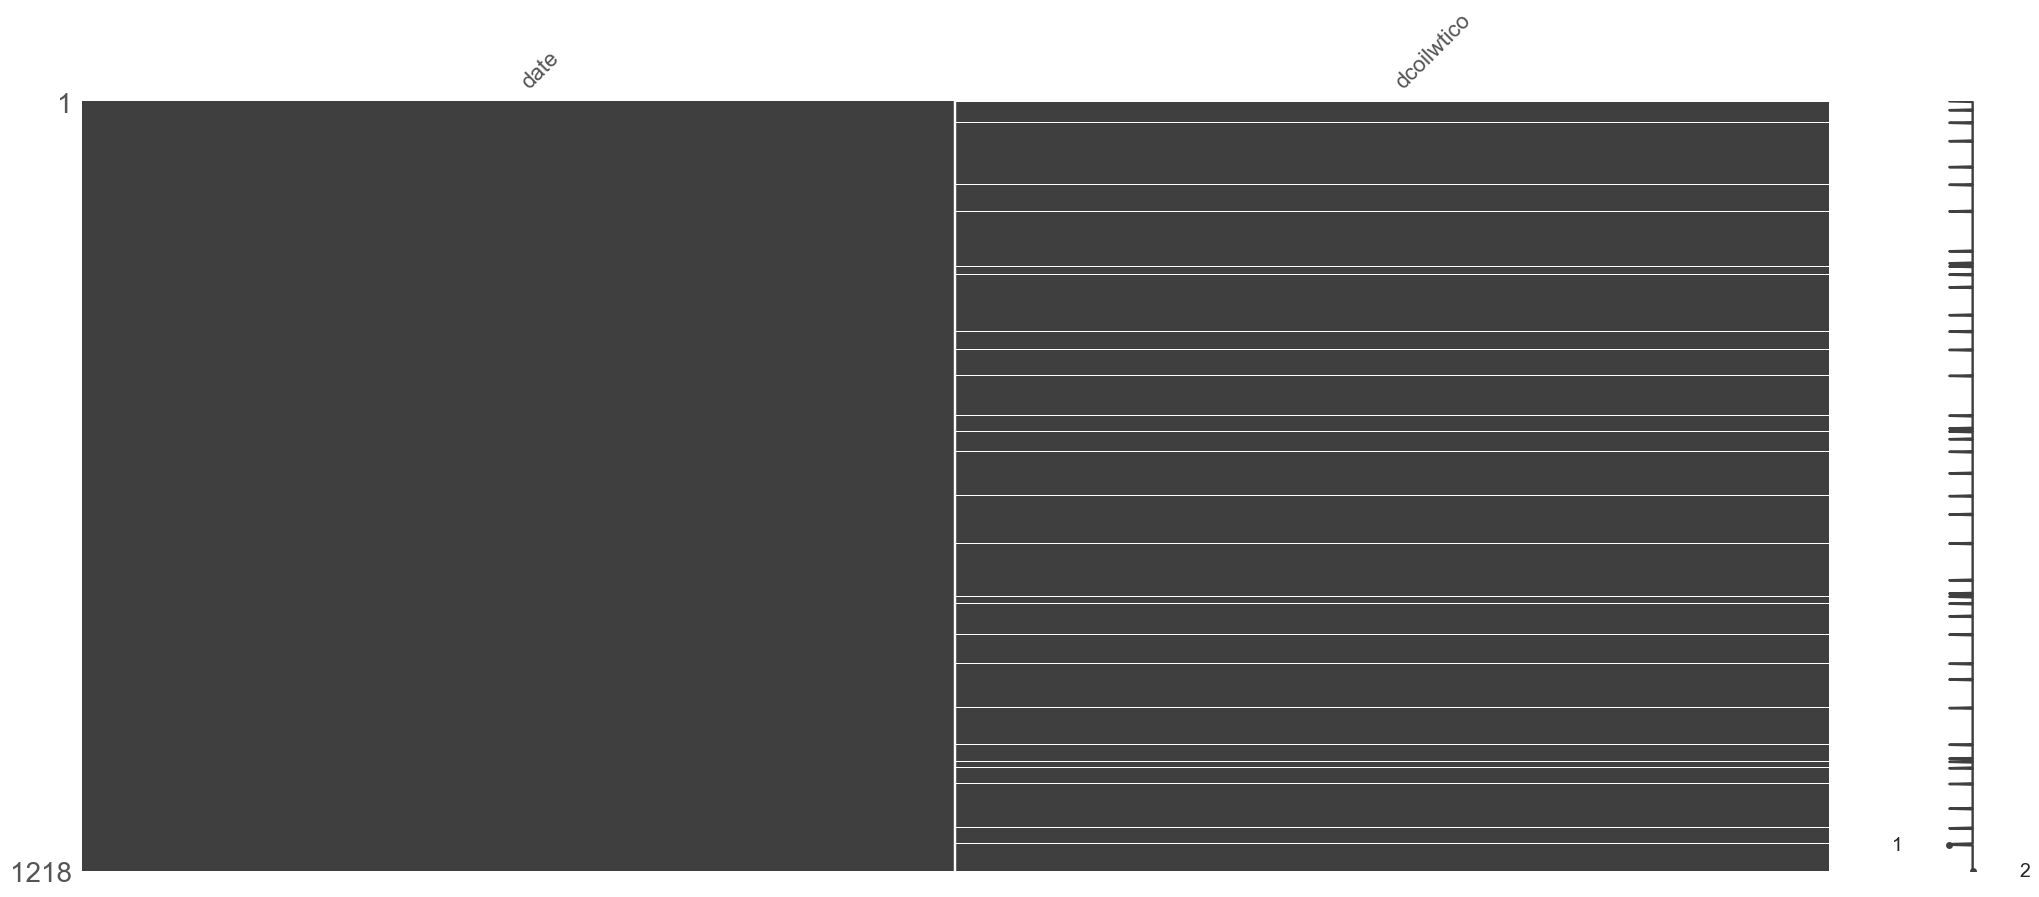

In [17]:
# Visualize missing values as a matrix
msno.matrix(df_oil)

<AxesSubplot: title={'center': 'Trend in DCOILWTICO'}, ylabel='Dollars per Barrel, Not Seasonally Adjusted (DCOILWTICO)'>

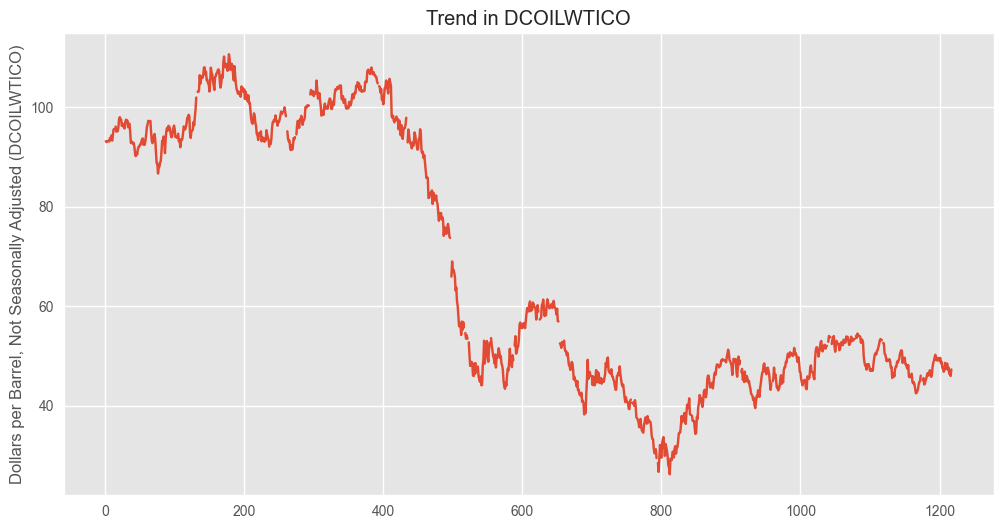

In [18]:
# plotting dcoilwtico as a trend
plt.title('Trend in DCOILWTICO')
plt.ylabel('Dollars per Barrel, Not Seasonally Adjusted (DCOILWTICO)')
df_oil.dcoilwtico.plot()

In [19]:
# # Replace NULL values with the number between the previous and next row
# df_oil["dcoilwtico"].interpolate(method='linear',inplace=True)
# df_oil.loc[0,"dcoilwtico"] = 93

# plt.title('Trend in DCOILWTICO')
# plt.ylabel('Dollars per Barrel, Not Seasonally Adjusted (DCOILWTICO)')
# df_oil.dcoilwtico.plot(x=df_oil.date)

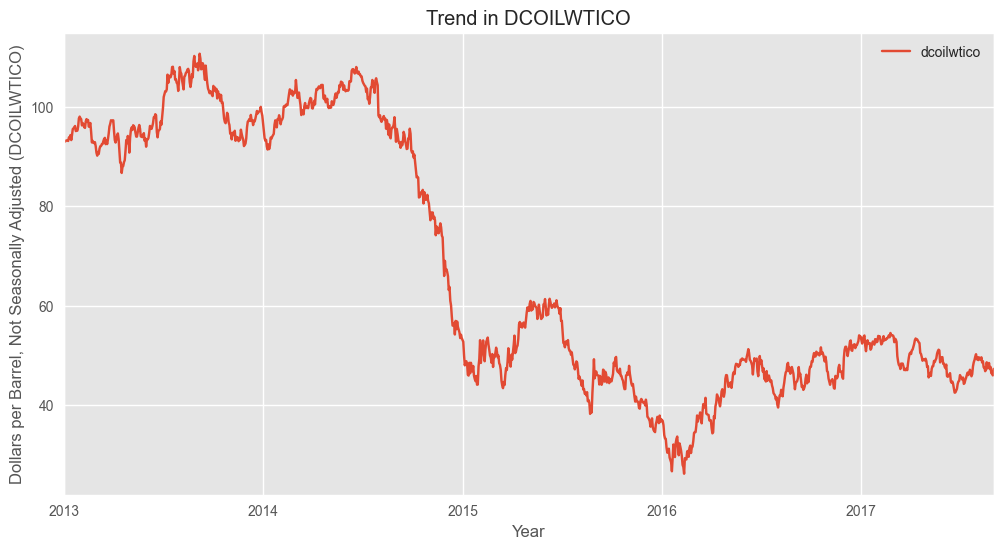

In [20]:
# Interpolate the missing values using linear method
df_oil["dcoilwtico"].interpolate(method='linear', inplace=True)

# Replace the first value with 93
df_oil.loc[0, "dcoilwtico"] = 93

# Plot the trend in dcoilwtico
df_oil.plot(x='date', y='dcoilwtico')
plt.title('Trend in DCOILWTICO')
plt.ylabel('Dollars per Barrel, Not Seasonally Adjusted (DCOILWTICO)')
plt.xlabel('Year')

# Show the plot
plt.show()


In [21]:
# finding the current and last date
df_oil["date"].min(),df_oil["date"].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-31 00:00:00'))

>stores dataset

In [22]:
# Show the first 5 rows of the dataframe 'df_stores'
df_stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [23]:
# Rename the 'type' column to 'store_type' in the dataframe 'df_stores'
df_stores.rename(columns={'type' : 'store_type'}, inplace=True)

In [24]:
# Check information about the dataframe 'df_stores'
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   store_nbr   54 non-null     int64 
 1   city        54 non-null     object
 2   state       54 non-null     object
 3   store_type  54 non-null     object
 4   cluster     54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [25]:
# checking for duplicates
df_stores.duplicated().sum()

0

In [26]:
# checking for null values
df_stores.isna().sum()

store_nbr     0
city          0
state         0
store_type    0
cluster       0
dtype: int64

> test dataset

In [27]:
# Display the first 5 rows of the 'df_test' dataframe
df_test.head()

,date,store_nbr,family,onpromotion
id,,,,
3000888,2017-08-16,1,AUTOMOTIVE,0
3000889,2017-08-16,1,BABY CARE,0
3000890,2017-08-16,1,BEAUTY,2
3000891,2017-08-16,1,BEVERAGES,20
3000892,2017-08-16,1,BOOKS,0


In [28]:
# Check the shape (number of rows, number of columns) of the dataframe 'df_test'
df_test.shape

(28512, 4)

In [29]:
# Check information about the dataframe 'df_test'
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28512 entries, 3000888 to 3029399
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         28512 non-null  datetime64[ns]
 1   store_nbr    28512 non-null  int64         
 2   family       28512 non-null  object        
 3   onpromotion  28512 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 1.1+ MB


In [30]:
# Count the number of missing (NaN) values in each column of the dataframe 'df_test'
df_test.isna().sum()

date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

In [31]:
# Get the unique values of the 'family' column in the dataframe 'df_test'
df_test['family'].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [32]:
# Count the occurrences of each unique value in the 'family' column in the dataframe 'df_test'
df_test['family'].value_counts()

AUTOMOTIVE                    864
HOME APPLIANCES               864
SCHOOL AND OFFICE SUPPLIES    864
PRODUCE                       864
PREPARED FOODS                864
POULTRY                       864
PLAYERS AND ELECTRONICS       864
PET SUPPLIES                  864
PERSONAL CARE                 864
MEATS                         864
MAGAZINES                     864
LIQUOR,WINE,BEER              864
LINGERIE                      864
LAWN AND GARDEN               864
LADIESWEAR                    864
HOME CARE                     864
HOME AND KITCHEN II           864
BABY CARE                     864
HOME AND KITCHEN I            864
HARDWARE                      864
GROCERY II                    864
GROCERY I                     864
FROZEN FOODS                  864
EGGS                          864
DELI                          864
DAIRY                         864
CLEANING                      864
CELEBRATION                   864
BREAD/BAKERY                  864
BOOKS         

In [33]:
# Generate descriptive statistics of the numerical columns in the dataframe 'df_test'
df_test.describe()

,store_nbr,onpromotion
count,28512.000000,28512.000000
mean,27.500000,6.965383
std,15.586057,20.683952
min,1.000000,0.000000
25%,14.000000,0.000000
50%,27.500000,0.000000
75%,41.000000,6.000000
max,54.000000,646.000000


In [34]:
# checking skewness and kurtosis in test data

print(f"Skewness: {df_test['store_nbr'].skew()}")
print(f"Kurtosis: {df_test['store_nbr'].kurt()}")

Skewness: 0.0
Kurtosis: -1.200823469063875


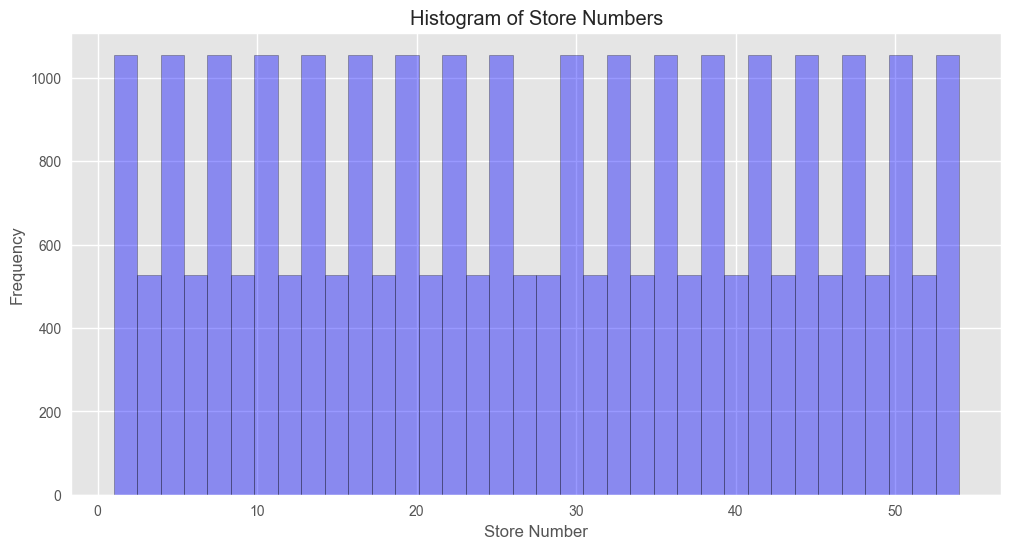

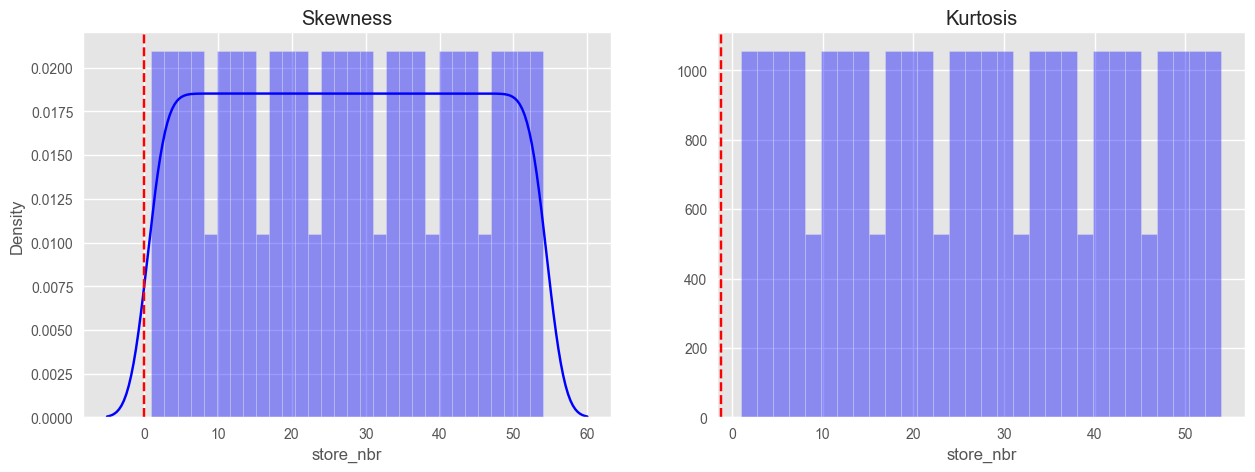

In [35]:
sns.distplot(df_test['store_nbr'], hist=True, kde=False,
            bins=int(180/5), color = 'blue',
            hist_kws={'edgecolor':'black'})

plt.title('Histogram of Store Numbers')
plt.xlabel('Store Number')
plt.ylabel('Frequency')

plt.show()


fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.distplot(df_test['store_nbr'], ax=ax[0], color='blue')
sns.distplot(df_test['store_nbr'], ax=ax[1], color='blue', kde=False)

ax[0].axvline(df_test['store_nbr'].skew(), color='red', linestyle='--')
ax[1].axvline(df_test['store_nbr'].kurt(), color='red', linestyle='--')

ax[0].set_title("Skewness")
ax[1].set_title("Kurtosis")
plt.show()



> train dataset

In [36]:
# Check the shape (number of rows, number of columns) of the dataframe 'df_train'
df_train.shape

(3000888, 5)

In [37]:
# Show the first 5 rows of the dataframe 'df_train'
df_train.head()

,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,2013-01-01,1,BABY CARE,0.0,0
2,2013-01-01,1,BEAUTY,0.0,0
3,2013-01-01,1,BEVERAGES,0.0,0
4,2013-01-01,1,BOOKS,0.0,0


In [38]:
# Check information about the dataframe 'df_train'
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000888 entries, 0 to 3000887
Data columns (total 5 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   store_nbr    int64         
 2   family       object        
 3   sales        float64       
 4   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 137.4+ MB


In [39]:
# Check the minimum and maximum values of the 'date' column in the dataframe 'df_train'
# Calculate the difference between the maximum and minimum values of the 'date' column
df_train.date.min(),df_train.date.max(),df_train.date.max()-df_train.date.min()

(Timestamp('2013-01-01 00:00:00'),
 Timestamp('2017-08-15 00:00:00'),
 Timedelta('1687 days 00:00:00'))

In [40]:
# Generate descriptive statistics of the numerical columns in the dataframe 'df_train'
df_train.describe()

,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06
mean,2.750000e+01,3.577757e+02,2.602770e+00
std,1.558579e+01,1.101998e+03,1.221888e+01
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.400000e+01,0.000000e+00,0.000000e+00
50%,2.750000e+01,1.100000e+01,0.000000e+00
75%,4.100000e+01,1.958473e+02,0.000000e+00
max,5.400000e+01,1.247170e+05,7.410000e+02


In [41]:
# Count the number of duplicated rows in the dataframe 'df_train'
df_train.duplicated().sum()

0

In [42]:
# checking skewness and kurtosis in the train dataset

print(f"Skewness: {df_train['sales'].skew()}")
print(f"Kurtosis: {df_train['sales'].kurt()}")

Skewness: 7.358757818882655
Kurtosis: 154.5620923696481


> transactions dataset

In [43]:
# Show the first 5 rows of the dataframe 'df_transactions'
df_transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [44]:
# Check the shape (number of rows, number of columns) of the dataframe 'df_transactions'
df_transactions.shape

(83488, 3)

In [45]:
# Check information about the dataframe 'df_transactions'
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [46]:
# Count the number of duplicated rows in the dataframe 'df_transactions'
df_transactions.duplicated().sum()

0

In [47]:
# Check the minimum and maximum values of the 'date' column in the dataframe 'df_transactions'
# Calculate the difference between the maximum and minimum values of the 'date' column
df_transactions.date.min(),df_transactions.date.max(),df_transactions.date.max()-df_transactions.date.min()

(Timestamp('2013-01-01 00:00:00'),
 Timestamp('2017-08-15 00:00:00'),
 Timedelta('1687 days 00:00:00'))

## Multivariate Analysis

> oil dataframe

In [48]:
df_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1218 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


(array([[   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         1218.],
        [1218.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.]]),
 array([   26.19 ,  1764.471,  3502.752,  5241.033,  6979.314,  8717.595,
        10455.876, 12194.157, 13932.438, 15670.719, 17409.   ]),
 <a list of 2 BarContainer objects>)

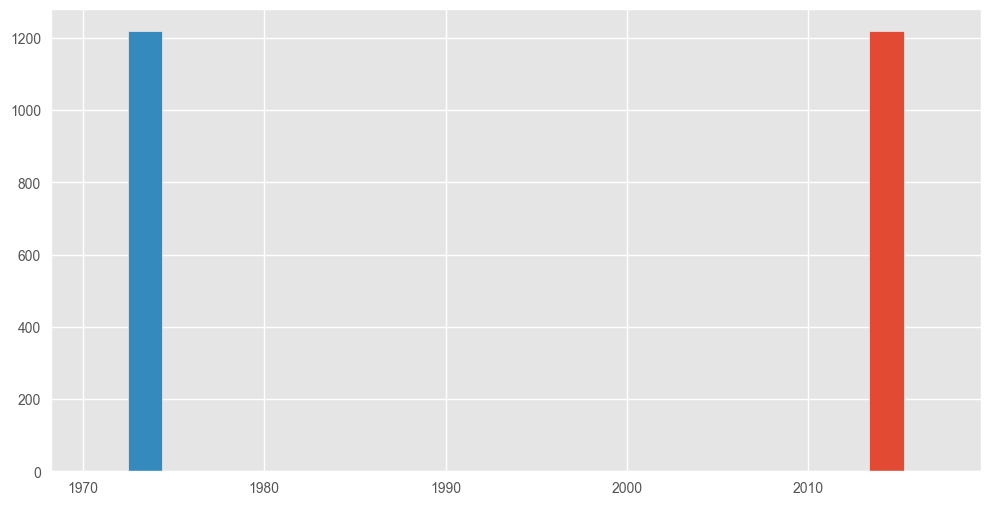

In [49]:
plt.hist(df_oil)

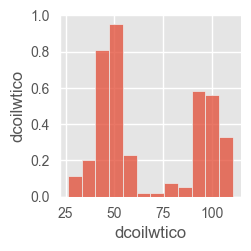

In [50]:
sns.pairplot(df_oil)

<AxesSubplot: xlabel='date', ylabel='dcoilwtico'>

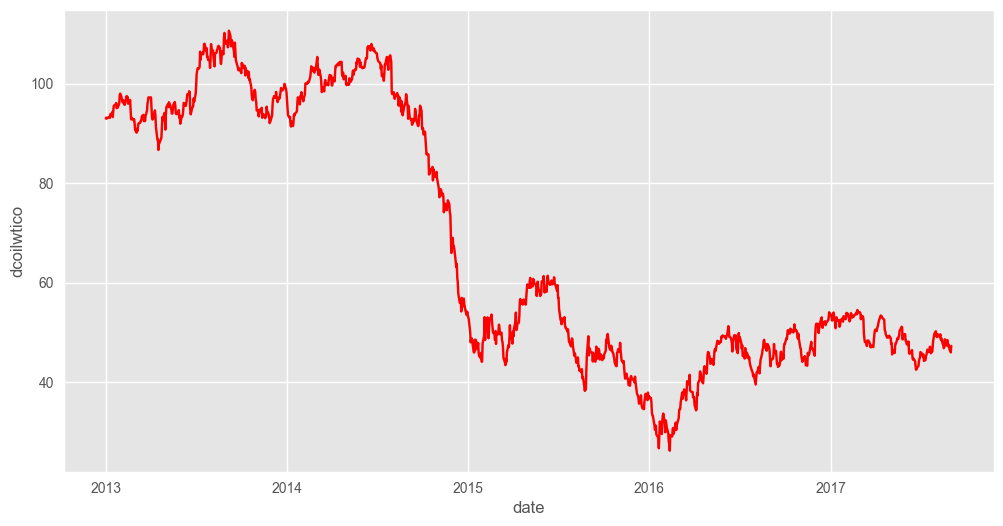

In [51]:
sns.lineplot(x='date', y= 'dcoilwtico', data=df_oil, color = 'red')

> stores dataframe

In [52]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   store_nbr   54 non-null     int64 
 1   city        54 non-null     object
 2   state       54 non-null     object
 3   store_type  54 non-null     object
 4   cluster     54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [53]:
df_stores.corr()

,store_nbr,cluster
store_nbr,1.000000,-0.059284
cluster,-0.059284,1.000000


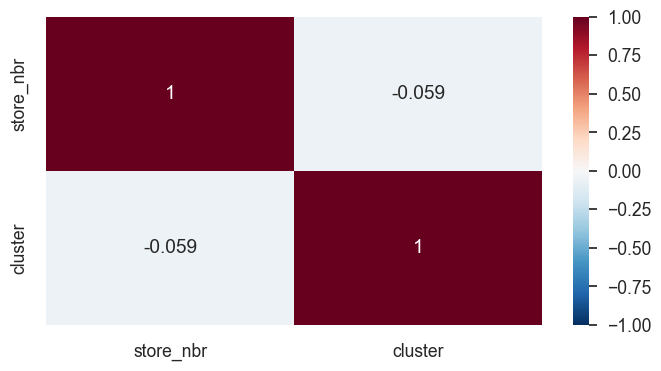

In [54]:
sns.set(font_scale=1.15)
plt.figure(figsize=(8,4))
sns.heatmap(
    df_stores.corr(),        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);

Text(0, 0.5, 'Number of Stores')

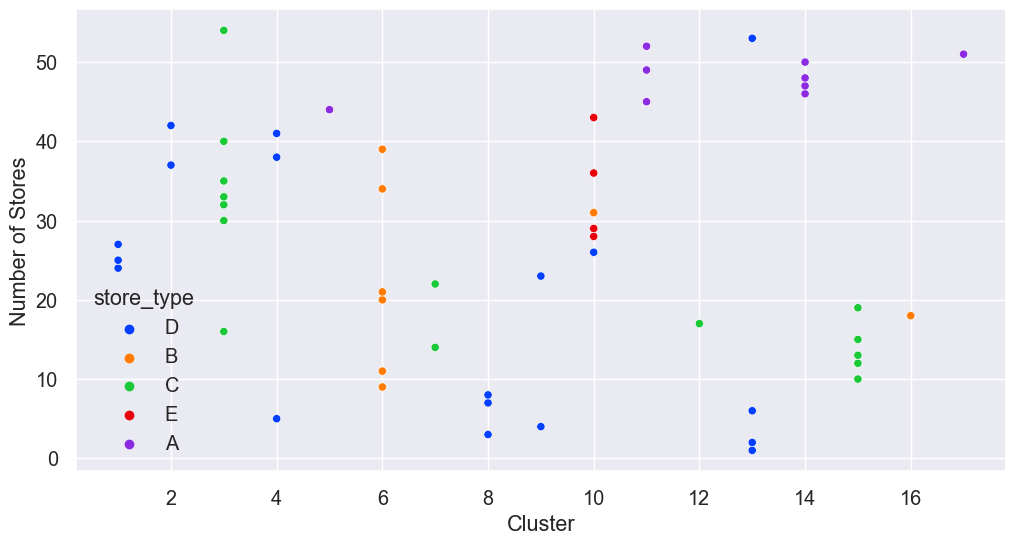

In [55]:
sns.set(font_scale=1.3)
sns.scatterplot(
    x='cluster', 
    y='store_nbr', 
    data=df_stores,
    palette = 'bright',
    hue = 'store_type')
plt.xlabel(
    'Cluster')
plt.ylabel(
    'Number of Stores')

> train dataframe

In [56]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000888 entries, 0 to 3000887
Data columns (total 5 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   store_nbr    int64         
 2   family       object        
 3   sales        float64       
 4   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 137.4+ MB


In [57]:
df_train.corr()

,store_nbr,sales,onpromotion
store_nbr,1.000000,0.041196,0.007286
sales,0.041196,1.000000,0.427923
onpromotion,0.007286,0.427923,1.000000


<AxesSubplot: >

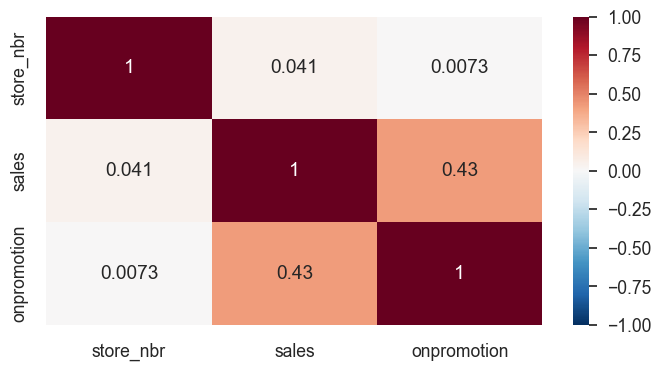

In [58]:
sns.set(font_scale=1.15)
plt.figure(figsize=(8,4))
sns.heatmap(
    df_train.corr(),        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1)

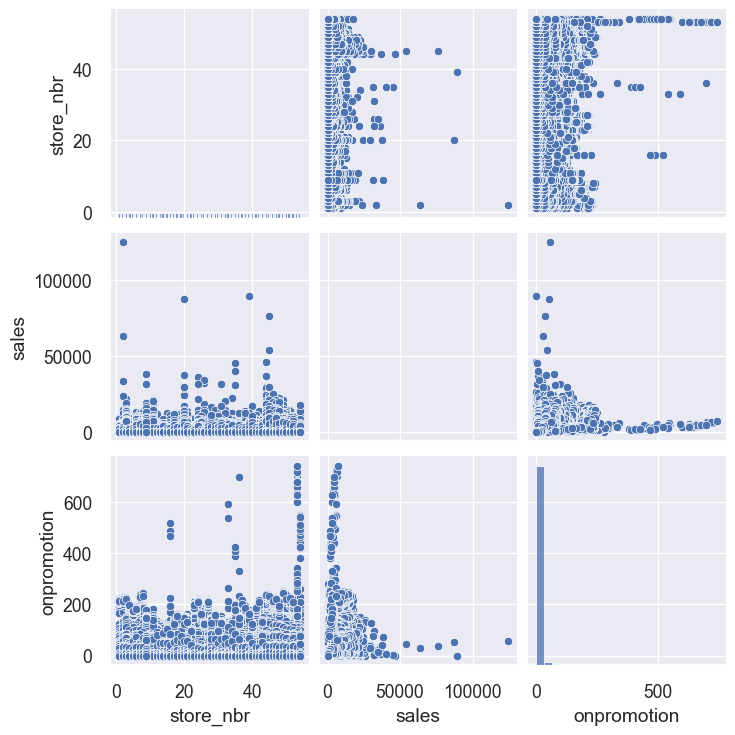

In [59]:
sns.pairplot(df_train)

In [60]:
# sns.pairplot(
#     data=df_train, 
#     aspect=.85,
#     hue='family')

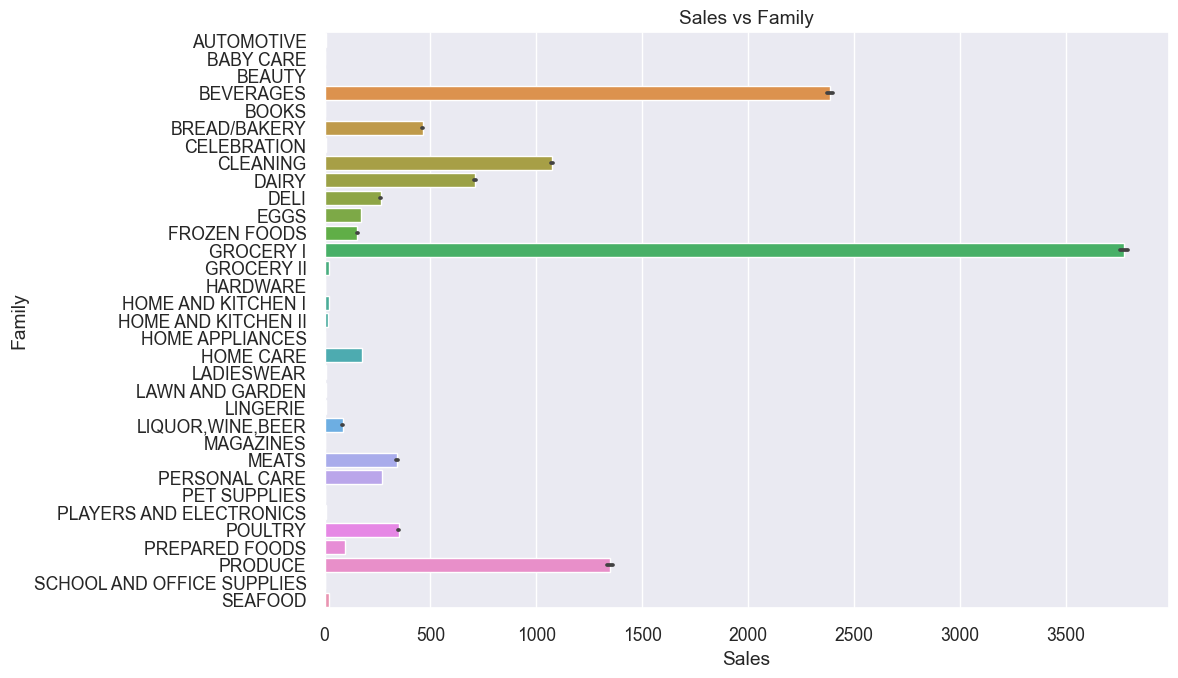

In [61]:
# Initialize the plot with a specified figure size
plt.figure(figsize=(12,7))

# Plotting the barplot
sns.barplot(x='sales', y='family', data=df_train)

# Adding labels and title to the plot
plt.xlabel('Sales')
plt.ylabel('Family')
plt.title('Sales vs Family')

# Adjust the plot layout to reduce padding
plt.tight_layout()

# Show the plot
plt.show()

> test dataframe

In [62]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28512 entries, 3000888 to 3029399
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         28512 non-null  datetime64[ns]
 1   store_nbr    28512 non-null  int64         
 2   family       28512 non-null  object        
 3   onpromotion  28512 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 1.1+ MB


In [63]:
df_test.corr()

,store_nbr,onpromotion
store_nbr,1.000000,0.008815
onpromotion,0.008815,1.000000


<AxesSubplot: >

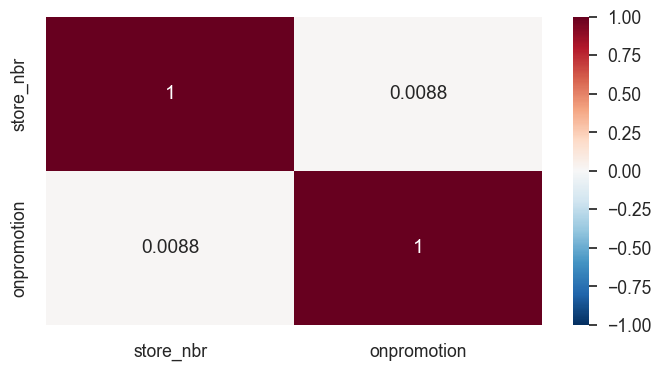

In [64]:
sns.set(font_scale=1.15)
plt.figure(figsize=(8,4))
sns.heatmap(
    df_test.corr(),        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1)

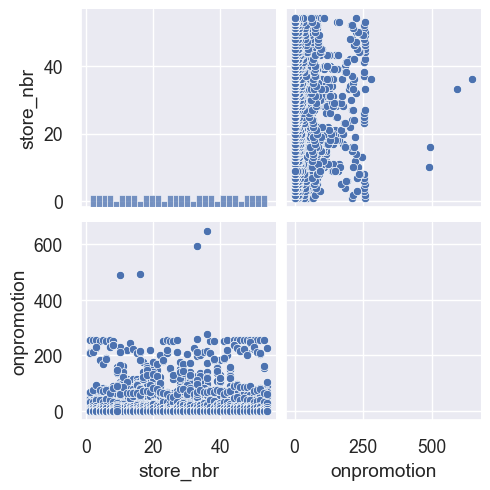

In [65]:
sns.pairplot(df_test)

In [66]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [67]:
df_transactions.corr()

,store_nbr,transactions
store_nbr,1.000000,0.189311
transactions,0.189311,1.000000


<AxesSubplot: >

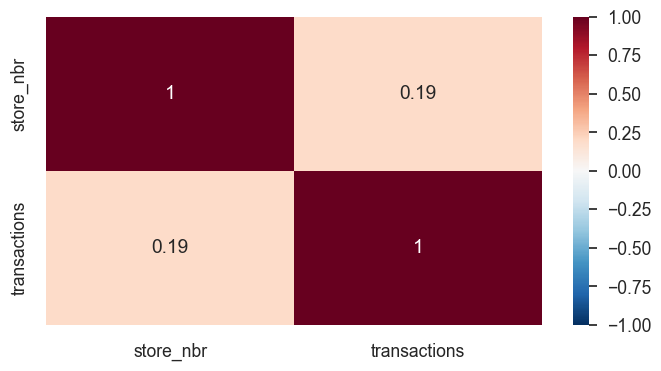

In [68]:
sns.set(font_scale=1.15)
plt.figure(figsize=(8,4))
sns.heatmap(
    df_transactions.corr(),        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1)

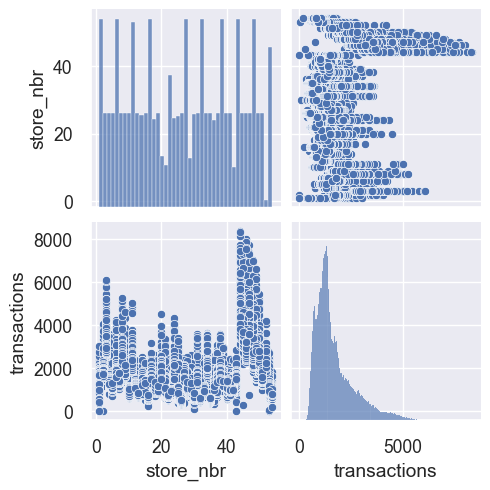

In [69]:
sns.pairplot(df_transactions)

Text(0, 0.5, 'Number of Stores')

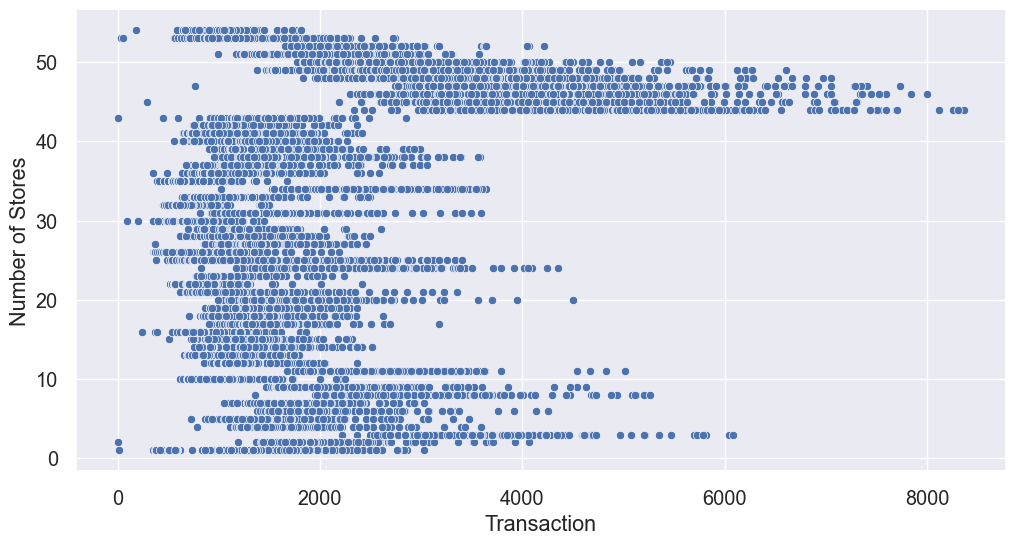

In [70]:
sns.set(font_scale=1.3)
sns.scatterplot(
    x='transactions', 
    y='store_nbr', 
    data=df_transactions)
plt.xlabel(
    'Transaction')
plt.ylabel(
    'Number of Stores')

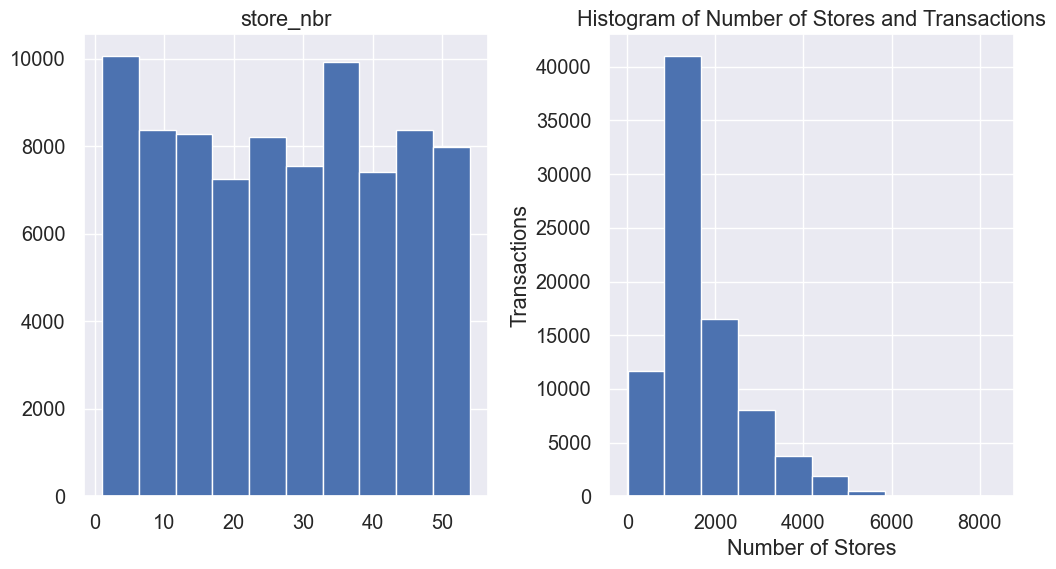

In [71]:
# Plot a histogram of store_nbr and transactions
df_transactions[['store_nbr', 'transactions']].hist()

# Adding labels and title to the plot
plt.xlabel('Number of Stores')
plt.ylabel('Transactions')
plt.title('Histogram of Number of Stores and Transactions')

# Show the plot
plt.show()

<AxesSubplot: xlabel='date', ylabel='transactions'>

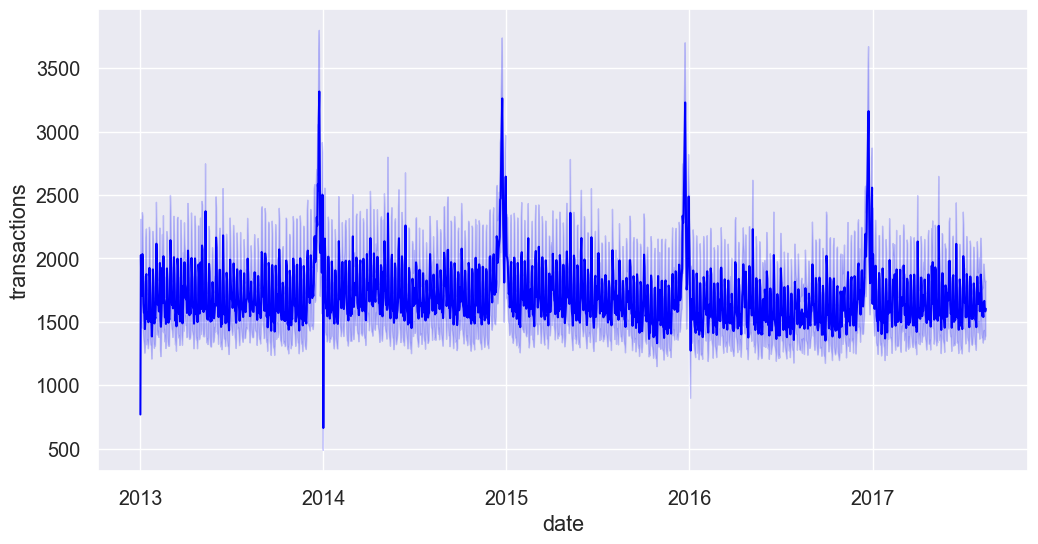

In [72]:
sns.lineplot(x='date', y= 'transactions', data=df_transactions, color = 'blue')

## Merging datasets


> Store data

In [73]:
train_data = pd.merge(df_train, df_stores, on="store_nbr", how="left")
test_data = pd.merge(df_test, df_stores, on="store_nbr", how="left")
train_data.head()

,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster
0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13
1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13
2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13
3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13
4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13


> Oil data

In [74]:
train_data = pd.merge(train_data, df_oil, on="date", how="left")
test_data = pd.merge(test_data, df_oil, on="date", how="left")

train_data.head()

,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,dcoilwtico
0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,93.0
1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,93.0
2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,93.0
3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,93.0
4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,93.0


> Transactions data

In [75]:
train_data = pd.merge(train_data, df_transactions, on=["date", "store_nbr"], how="left")
test_data = pd.merge(test_data, df_transactions, on=["date", "store_nbr"], how="left")

train_data.head()

,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,dcoilwtico,transactions
0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,93.0,NaN
1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,93.0,NaN
2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,93.0,NaN
3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,93.0,NaN
4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,93.0,NaN


> Holiday Events

In [76]:
holidays_data = df_holidays_events.groupby("date")[["holiday_type", "transferred", "locale", "city"]].agg(lambda x: x.unique() if x.nunique() > 1 else list(x)) # adding multiple holidays at the same day an unique row

holidays_data["n_holidays"] = holidays_data.holiday_type.map(lambda x: len(x))

In [77]:
train_data = pd.merge(train_data, df_holidays_events, on="date", how="left", )
test_data = pd.merge(test_data, df_holidays_events, on="date", how="left")

train_data

,date,store_nbr,family,sales,onpromotion,city_x,state,store_type,cluster,dcoilwtico,transactions,holiday_type,locale,city_y,transferred
0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,93.00,NaN,Holiday,National,Ecuador,False
1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,93.00,NaN,Holiday,National,Ecuador,False
2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,93.00,NaN,Holiday,National,Ecuador,False
3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,93.00,NaN,Holiday,National,Ecuador,False
4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,93.00,NaN,Holiday,National,Ecuador,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,47.57,2155.0,Holiday,Local,Riobamba,False
3054344,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,47.57,2155.0,Holiday,Local,Riobamba,False
3054345,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,47.57,2155.0,Holiday,Local,Riobamba,False
3054346,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,47.57,2155.0,Holiday,Local,Riobamba,False


In [78]:
train_data.set_index('date', inplace=True)

train_data

,store_nbr,family,sales,onpromotion,city_x,state,store_type,cluster,dcoilwtico,transactions,holiday_type,locale,city_y,transferred
date,,,,,,,,,,,,,,
2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,93.00,NaN,Holiday,National,Ecuador,False
2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,93.00,NaN,Holiday,National,Ecuador,False
2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,93.00,NaN,Holiday,National,Ecuador,False
2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,93.00,NaN,Holiday,National,Ecuador,False
2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,93.00,NaN,Holiday,National,Ecuador,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,47.57,2155.0,Holiday,Local,Riobamba,False
2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,47.57,2155.0,Holiday,Local,Riobamba,False
2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,47.57,2155.0,Holiday,Local,Riobamba,False


In [79]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3054348 entries, 2013-01-01 to 2017-08-15
Data columns (total 14 columns):
 #   Column        Dtype  
---  ------        -----  
 0   store_nbr     int64  
 1   family        object 
 2   sales         float64
 3   onpromotion   int64  
 4   city_x        object 
 5   state         object 
 6   store_type    object 
 7   cluster       int64  
 8   dcoilwtico    float64
 9   transactions  float64
 10  holiday_type  object 
 11  locale        object 
 12  city_y        object 
 13  transferred   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 349.5+ MB


In [80]:
train_data.isna().sum()

store_nbr             0
family                0
sales                 0
onpromotion           0
city_x                0
state                 0
store_type            0
cluster               0
dcoilwtico       878526
transactions     249117
holiday_type    2551824
locale          2551824
city_y          2551824
transferred     2551824
dtype: int64

In [81]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
store_nbr,3054348.0,27.500000,15.585787,1.00,14.00,27.50,41.000,54.00
sales,3054348.0,359.020892,1107.285897,0.00,0.00,11.00,196.011,124717.00
onpromotion,3054348.0,2.617480,12.254939,0.00,0.00,0.00,0.000,741.00
cluster,3054348.0,8.481481,4.649735,1.00,4.00,8.50,13.000,17.00
dcoilwtico,2175822.0,67.942610,25.672953,26.19,46.46,53.41,95.800,110.62
transactions,2805231.0,1697.071441,966.831652,5.00,1046.00,1395.00,2081.000,8359.00


In [82]:
train_data.shape

(3054348, 14)

In [83]:
train_data.corr()

,store_nbr,sales,onpromotion,cluster,dcoilwtico,transactions
store_nbr,1.000000e+00,0.041273,0.007744,-5.928399e-02,8.490047e-15,0.189656
sales,4.127337e-02,1.000000,0.428241,3.853669e-02,-7.923776e-02,0.214848
onpromotion,7.744102e-03,0.428241,1.000000,5.701707e-03,-1.524968e-01,0.025809
cluster,-5.928399e-02,0.038537,0.005702,1.000000e+00,-4.121611e-14,0.196110
dcoilwtico,8.490047e-15,-0.079238,-0.152497,-4.121611e-14,1.000000e+00,0.018671
transactions,1.896558e-01,0.214848,0.025809,1.961100e-01,1.867136e-02,1.000000


<AxesSubplot: >

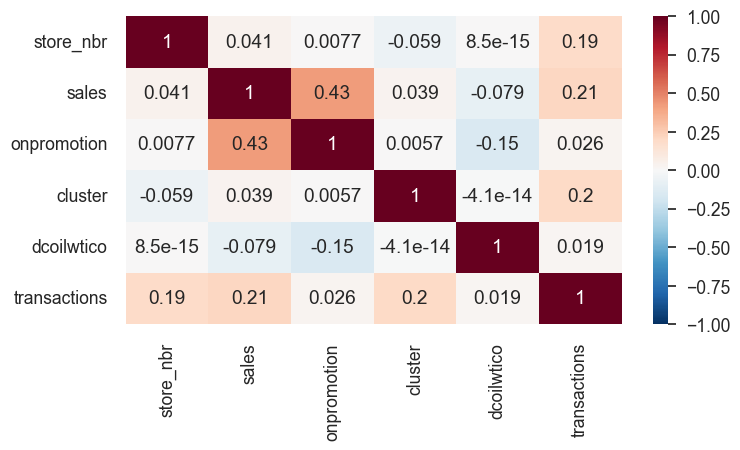

In [84]:
sns.set(font_scale=1.15)
plt.figure(figsize=(8,4))
sns.heatmap(
    train_data.corr(),        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1)

In [85]:
#sns.pairplot(train_data)

## Answering the Qustions 

### 1. What is the correlation between oil prices (dcoilwtico) and product sales


It is observed from the diagram above that the is a negative correlation between oil prices (dcoilwtico) and product sales (correlation coefficient of -0.79)

### 2.	What is the overall trend of sales for the items over time?

In [86]:
# # Plotting the line plot
# sns.lineplot(x='date', y='sales', data=train_data)

# # Adding labels and title to the plot
# plt.xlabel('Date')
# plt.ylabel('Sales')
# plt.title('Overall Trend of Sales Over Time')

# # Show the plot
# plt.show()

### 3.	How do promotions affect the sales of the items?

In [87]:
# # Plotting the bar plot
# sns.barplot(x='onpromotion', y='sales', data=train_data)

# # Adding labels and title to the plot
# plt.xlabel('Promotion')
# plt.ylabel('Sales')
# plt.title('Effect of Promotions on Sales')

# # Show the plot
# plt.show()

### 4.	How do different products perform in terms of sales across different stores?

In [88]:
# plt.tight_layout()

# # Plotting the barplot
# sns.barplot(x='store_type', y='sales', hue='family', data=train_data)

# # Adding labels and title to the plot
# plt.xlabel('Store')
# plt.ylabel('Sales')
# plt.title('Sales of Different Products Across Different Stores')

# # Show the plot
# plt.show()

### 5.	Are there any seasonal patterns in the sales of the items?

In [89]:
# # Resample the DataFrame to obtain the mean sales value for each month
# monthly_mean = train_data.resample('M').mean()

# # Plot the line plot
# sns.lineplot(x='date', y='sales', data=monthly_mean)

# # Adding labels and title to the plot
# plt.xlabel('Date')
# plt.ylabel('Sales')
# plt.title('Seasonal Patterns in Sales of Items')

# # Show the plot
# plt.show()

### 6.	Are there any specific stores or products that have consistently high or low sales?

In [90]:
# plt.tight_layout()

# # Plotting the box plot
# sns.boxplot(x='store_type', y='sales', hue='family', data=train_data)

# # Adding labels and title to the plot
# plt.xlabel('Store')
# plt.ylabel('Sales')
# plt.title('Consistently High or Low Sales by Store and Product')

# # Show the plot
# plt.show()

### 7.	How does the sales of the items compare across different date ranges?

In [91]:
# # Split the DataFrame into two date ranges
# df_2013_2015 = train_data[(train_data.index >= '2013-01-01') & (train_data.index < '2015-01-01')]
# df_2016_2017 = train_data[(train_data.index >= '2015-01-01') & (train_data.index < '2017-01-01')]

# # Plot the line plots
# sns.lineplot(x='date', y='sales', data=df_2013_2015)
# sns.lineplot(x='date', y='sales', data=df_2016_2017)

# # Adding labels and title to the plot
# plt.xlabel('Date')
# plt.ylabel('Sales')
# plt.title('Comparison of Sales across Different Date Ranges')
# plt.legend()

# # Show the plot
# plt.show()

### 9.	How does the sales of the items vary across different stores?

In [92]:
# # Plotting the bar plot
# sns.barplot(x='store_type', y='sales', data=train_data)

# # Adding labels and title to the plot
# plt.xlabel('Type of Store')
# plt.ylabel('Sales')
# plt.title('Sales Comparision across Different Stores')

# # Show the plot
# plt.show()

### 10. Are there any outliers in the sales data that may require further investigation?

In [93]:
# # Plotting the box plot
# sns.boxplot(x=train_data['sales'])

# # Adding label and title to the plot
# plt.xlabel('Sales')
# plt.title('Box Plot of Sales Data')

# # Show the plot
# plt.show()

### Insights on the Stores

In [94]:
# fig = go.Figure(data=[go.Table(header=dict(values=['KPI', 'Value']),
#                                cells=dict(values=[['Number of Stores', 
#                                                    'Number of Store Types', 
#                                                    'Total Number of cities', 
#                                                    'Total Number of States',
#                                                    'No of clusters'], 
#                                                   [len(df_stores.index.values), 
#                                                    df_stores['store_type'].nunique(), 
#                                                    df_stores['city'].nunique(), 
#                                                    df_stores['state'].nunique(),
#                                                    df_stores['cluster'].nunique()]]))
# ])
# fig.update_layout({'title': f'BASIC KPIS of STORE DATA'}, height=305)
# fig.show();

- There are 54 different stores which are located in 22 different cities in 16 states. 
- These 54 stores are divided in to 5 Types and 17 clusters.

In [95]:
# # Creating a bar plot
# fig, ax = plt.subplots(figsize=(22,8))

# # Grouping the data by state and city and counting the number of stores in each city
# df_stores_grouped = df_stores.groupby(['state','city']).agg({'store_nbr':'count'}).reset_index()

# # Sorting the data by state and number of stores
# df_stores_grouped.sort_values(by=['state','store_nbr'],ascending=[True,False],inplace=True)

# # Getting the top 10 states
# top_states = df_stores_grouped.state.value_counts().index[:10]

# # Creating a custom legend list
# custom_legend = []

# # Plotting the top 10 states
# for state in top_states:
#     state_df = df_stores_grouped[df_stores_grouped['state'] == state]
#     ax.bar(state_df['city'], state_df['store_nbr'])
#     custom_legend.append( state + " (Total {})".format(state_df.store_nbr.sum()))

# # Setting the y-axis to show integers only
# ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# # Setting the title, x-label and y-label
# ax.set_title("Distribution of Store by City and State")
# ax.set_ylabel("Number of stores")
# ax.set_xlabel("City")

# # Setting the legend
# ax.legend(custom_legend, fontsize="small", title = "States")

# # Rotating the x-axis labels for better readability
# plt.xticks(rotation = 50)

# # Show the plot
# plt.show();


- Pichincha	has the highest number of stores(**Quito :- 18**,  **Cayambe:-  1**)

- Only 5 States have more than 2 stores. out of 16 states 7 of them have only 1 store in the entire state. 

> Distribution of Store by StoreType and cluster.

In [96]:
# # group stores by cluster and store type
# store_type_group = df_stores.groupby(by=["cluster","store_type"]).agg({"store_nbr":"count"})

# # reset index
# store_type_group.reset_index(inplace=True)

# # rename column
# store_type_group.rename(columns={"store_nbr" : "No_of_stores"},inplace=True)

# # pivot table
# pivot_store = pd.pivot_table(store_type_group,index=["cluster"],values=["No_of_stores"],columns=["store_type"],aggfunc=np.sum).fillna(0).astype(np.int32)

# # create a stacked bar plot
# fig, ax = plt.subplots(figsize=(15,8))
# pivot_store.plot(kind="bar",stacked=True,ax=ax)

# # set labels and titles
# ax.set_xlabel("Cluster",fontsize="large")
# ax.set_ylabel("No of stores",fontsize="large")
# ax.set_title("Distribution of Store by Store Type and Cluster")
# ax.tick_params(labelsize=15,labelrotation=0)

# #create custom legend
# store_type= df_stores.groupby(by=["store_type"]).agg({"store_nbr":"count"})
# custom_legend = []
# for i in list(store_type.index):
#     string = i + ": Total stores - " + str(store_type.loc[i].values[0])
#     custom_legend.append(string)

# # add legend to the plot
# ax.legend(custom_legend, fontsize="small", title = "Store Types")

# # show plot
# fig.show()


- There are 5 types of stores which are again distributed among 17 clusters. 
- cluster 3 has the highest number of stores followed by cluster 6 and 10
- Store type D has the higher number of stores.

> Daily Average Sales by All Stores

In [97]:
# # Set store_nbr as index
# df_stores.set_index("store_nbr",inplace=True)

# # Get all store ids
# store_nbr_id  = df_stores.index.values

# # Group sales by store_nbr and date to get the sum of sales
# sales_grouped = df_train.groupby(['store_nbr','date']).agg({'sales':'sum'})

# # Create a dictionary to store information about each store
# sales_by_store_id = {}
# for store in store_nbr_id:
#     sales_by_store_id[store] = {'sale': sales_grouped.loc[store].sales.mean(),
#                                 'city': df_stores.city[store] ,
#                                 'city-id': df_stores.city[store]+"-{}".format(store) ,
#                                 'state': df_stores.state[store] ,
#                                 'store_type': df_stores.store_type[store] ,
#                                 'cluster': df_stores.cluster[store]}

# # Convert dictionary to a dataframe
# sales_by_store_id = pd.DataFrame.from_dict(sales_by_store_id, orient='index') 

# # Sort dataframe by sale
# sales_by_store_id.sort_values( by='sale', inplace=True, ascending=False )

# # Plot the data
# figsize = (18,6)
# fig, ax1 = plt.subplots(figsize=figsize)
# sns.barplot(x='city-id',y='sale',data=sales_by_store_id,ax=ax1,palette = 'cubehelix')
# ax1.tick_params(axis="x",labelrotation=90)
# plt.suptitle("The Daily Average Sales for different stores ",  fontsize=16)
# ax1.set_ylabel('Average Sales by All Stores',  fontsize=16)
# plt.show()


- The 54 stores are located in different states and cities. The Average Daily sales of these 54 stores are very different from one another. The stores in the Quito city are having high Avg daily sales than all other stores.
- The Average sales of some of the stores are very less compared to the stores in the Quito city.

>  Distribution of Sales by city

In [98]:
# # Group the data by city
# sales_by_city = sales_by_store_id.groupby('city').agg({'sale': ['sum', 'mean']})

# # Sort the data by the sum of sales in descending order
# sales_by_city = sales_by_city.sort_values(by=('sale', 'sum'), ascending=False)

# # Reset the index and rename the columns
# sales_by_city.reset_index(inplace=True)
# sales_by_city.columns = ['city', 'sum_of_sales', 'avg_sales_per_store']

# # Plot the data using a bar chart
# color1 = "tab:green"
# color2 = "tab:brown"
# figsize=(20,6)
# fig, ax1 = plt.subplots(figsize=figsize)
# sales_by_city.plot(x='city', y='sum_of_sales', kind='bar', color=color1, ax=ax1, align='edge', width=-0.3, legend=False)
# ax2 = ax1.twinx()
# sales_by_city.plot(x='city', y='avg_sales_per_store', kind='bar', color=color2, ax=ax2, align='edge', width=0.3, legend=False)

# # Set the labels for the y-axes
# ax1.set_ylabel('Average Total Sales by City', fontsize=16)
# ax2.set_ylabel('Average Sales by Store by City', fontsize=16) 
# ax1.set_xlabel('City', fontsize=16)

# plt.show();

- From the above graph it is clear that Quito has the biggest daily-average sales both per city and per store, followed by cayamble which has only one store. 

# Feature Engineering

In [99]:
train_data.dropna()

,store_nbr,family,sales,onpromotion,city_x,state,store_type,cluster,dcoilwtico,transactions,holiday_type,locale,city_y,transferred
date,,,,,,,,,,,,,,
2013-01-01,25,AUTOMOTIVE,0.000,0,Salinas,Santa Elena,D,1,93.00,770.0,Holiday,National,Ecuador,False
2013-01-01,25,BABY CARE,0.000,0,Salinas,Santa Elena,D,1,93.00,770.0,Holiday,National,Ecuador,False
2013-01-01,25,BEAUTY,2.000,0,Salinas,Santa Elena,D,1,93.00,770.0,Holiday,National,Ecuador,False
2013-01-01,25,BEVERAGES,810.000,0,Salinas,Santa Elena,D,1,93.00,770.0,Holiday,National,Ecuador,False
2013-01-01,25,BOOKS,0.000,0,Salinas,Santa Elena,D,1,93.00,770.0,Holiday,National,Ecuador,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,47.57,2155.0,Holiday,Local,Riobamba,False
2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,47.57,2155.0,Holiday,Local,Riobamba,False
2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,47.57,2155.0,Holiday,Local,Riobamba,False


In [100]:
train_data.drop(columns=['family','city_x', 'state', 'store_type', 'city_y'], inplace= True)

In [101]:
# split the data into training and testing sets
train, test = train_test_split(train_data, test_size=0.2, random_state=42)

In [102]:
train_cat = train[['holiday_type', 'locale', 'transferred']]

In [103]:
cat_encoder = OneHotEncoder()
train_cat_1hot = cat_encoder.fit_transform(train_cat)
train_cat_1hot

<2443478x14 sparse matrix of type '<class 'numpy.float64'>'
	with 7330434 stored elements in Compressed Sparse Row format>

In [104]:
train_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [105]:
cat_encoder.categories_

[array(['Additional', 'Bridge', 'Event', 'Holiday', 'Transfer', 'Work Day',
        nan], dtype=object),
 array(['Local', 'National', 'Regional', nan], dtype=object),
 array([False, True, nan], dtype=object)]

In [106]:
corr_matrix = train.corr()

corr_matrix['sales'].sort_values(ascending = False)

sales           1.000000
onpromotion     0.429555
transactions    0.215324
store_nbr       0.040750
cluster         0.038310
dcoilwtico     -0.079563
Name: sales, dtype: float64

In [107]:
train_labels = train['sales'].copy()

train = train.drop('sales', axis=1)

train_num = train.drop(columns=['holiday_type', 'locale', 'transferred'])

train_labels.head()

date
2013-11-18     614.0
2013-09-10    1001.0
2016-11-29     144.0
2015-10-18     398.0
2017-04-14     218.0
Name: sales, dtype: float64

In [108]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([('imputer',
                        SimpleImputer(strategy = 'median')),
                        ('std_scaler', StandardScaler())])

train_num_tr = num_pipeline.fit_transform(train_num)

In [109]:
from sklearn.compose import ColumnTransformer

num_attribs = list(train_num)
cat_attribs = ['holiday_type', 'locale', 'transferred']
full_pipeline = ColumnTransformer([('num', num_pipeline, num_attribs), ('cat',
                OneHotEncoder(), cat_attribs)])

train_prepared = full_pipeline.fit_transform(train)

In [110]:
train_prepared.shape

(2443478, 19)

In [111]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_prepared, train_labels)

LinearRegression()

In [112]:
some_data = train.iloc[:5]
some_labels = train_labels.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)
print('Predictions:', lin_reg.predict(some_data_prepared))

Predictions: [195.703125  220.2890625 390.625     245.4375    487.5546875]


In [113]:
print('Labels:', list(some_labels))

Labels: [614.0, 1001.0, 144.0, 398.0, 218.0]


In [114]:
from sklearn.metrics import mean_squared_error

train_predictions = lin_reg.predict(train_prepared)
lin_mse = mean_squared_error(train_labels, train_predictions)
lin_rmse = np.sqrt(lin_mse)

lin_rmse

975.8055746835015

In [115]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_prepared, train_labels)

DecisionTreeRegressor()

In [116]:
train_predictions = tree_reg.predict(train_prepared)
tree_mse = mean_squared_error(train_labels, train_predictions)
tree_rmse = np.sqrt(tree_mse)

tree_rmse

589.0777922718962

In [117]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, train_prepared, train_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [118]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [1009.96981009  982.47836798 1013.44376205 1001.37473837  999.2637825
 1019.36730817 1059.99628882 1008.49851578 1026.20943565 1042.28091227]
Mean: 1016.2882921676753
Standard deviation: 21.113902698930932


In [119]:
lin_scores = cross_val_score(lin_reg, train_prepared, train_labels,scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [ 969.61918471  936.8953644   973.99400699  965.99470916  982.74543196
  967.13844204 1034.38270087  961.75225036  995.79866619  967.04573348]
Mean: 975.5366490160106
Standard deviation: 24.24789166970412


In [120]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(train_prepared, train_labels)

train_predictions = forest_reg.predict(train_prepared)
forest_mse = mean_squared_error(train_labels, train_predictions)
forest_rmse = np.sqrt(tree_mse)

forest_rmse

589.0777922718962

In [121]:
forest_scores = cross_val_score(forest_reg, train_prepared, train_labels,scoring="neg_mean_squared_error", cv=10)

forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

In [ ]:
# define p, d, q parameters for ARIMA model
p = 1  # number of autoregressive terms
d = 1  # order of differencing
q = 1  # number of moving average terms

# fit an ARIMA model to the training data
model = sm.tsa.ARIMA(train_prapared, order=(p,d,q))
results = model.fit()

# make predictions on the testing data
predictions = results.predict(start=test_start, end=test_end, dynamic=False)

In [ ]:
# # Group the data by "family" and sum the sales
# by_family = train_data.groupby("family").agg({"sales": "sum"}).sort_values(by="sales")

# # Keep only the top 10 categories based on sales
# top_10 = by_family.nlargest(10, "sales")

# # Capitalize the category names
# top_10.index = top_10.index.str.title()

# # Create the bar graph
# fig = px.bar(top_10, y=top_10.index, x="sales", orientation="h", color="sales", text="sales")

# # Update the layout
# fig.update_layout(
#     title={"text": "Top 10 Product Categories ($)",
#            "x": 0.5, "xanchor": "center",
#            "y": 0.9, "yanchor": "top"},
#     xaxis_title="Product Categories",
#     yaxis_title="Sales",
# )

# # Show the graph
# fig.show()


In [ ]:
# # Group the data by "store_type" and sum the sales
# by_store_type = train_data.groupby("store_type").agg({"sales": "sum"}).sort_values(by="sales", ascending=False)

# # Get the unique store type for each category
# store_types = train_data.groupby("store_type")["family"].apply(lambda x: x.unique())

# # Add the store type information to the by_store_type dataframe
# by_store_type["store_type"] = store_types

# # Show the results
# by_store_type

In [ ]:
# by_city = train_data[["family", "store_type", "sales"]].groupby(["family"]).agg({'sales':'sum', 'store_type':'unique'}).sort_values(by="sales", ascending=False)

# by_city[["sales", "store_type"]]

In [ ]:
train_data.dropna()

,store_nbr,sales,onpromotion,cluster,dcoilwtico,transactions,holiday_type,locale,transferred
date,,,,,,,,,
2013-01-01,25,0.000,0,1,93.00,770.0,Holiday,National,False
2013-01-01,25,0.000,0,1,93.00,770.0,Holiday,National,False
2013-01-01,25,2.000,0,1,93.00,770.0,Holiday,National,False
2013-01-01,25,810.000,0,1,93.00,770.0,Holiday,National,False
2013-01-01,25,0.000,0,1,93.00,770.0,Holiday,National,False
...,...,...,...,...,...,...,...,...,...
2017-08-15,9,438.133,0,6,47.57,2155.0,Holiday,Local,False
2017-08-15,9,154.553,1,6,47.57,2155.0,Holiday,Local,False
2017-08-15,9,2419.729,148,6,47.57,2155.0,Holiday,Local,False
